# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 🎯

In this beginner-friendly notebook, we'll walk through a step-by-step machine learning pipeline to predict whether a tumor is malignant or benign based on various features.

## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📥 Step 1: Load the Dataset

In [2]:
import pandas as pd
df = pd.read_csv("Cancer_Data.csv")

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display shape of the dataset
print("\nDataset shape (rows, columns):", df.shape)

First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_

## 🔍 Step 2: Explore the Dataset

Diagnosis value counts:
diagnosis
B    357
M    212
Name: count, dtype: int64


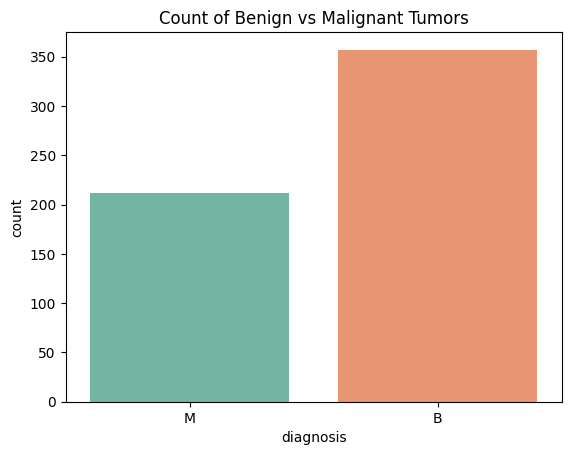


Statistical summary:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064 

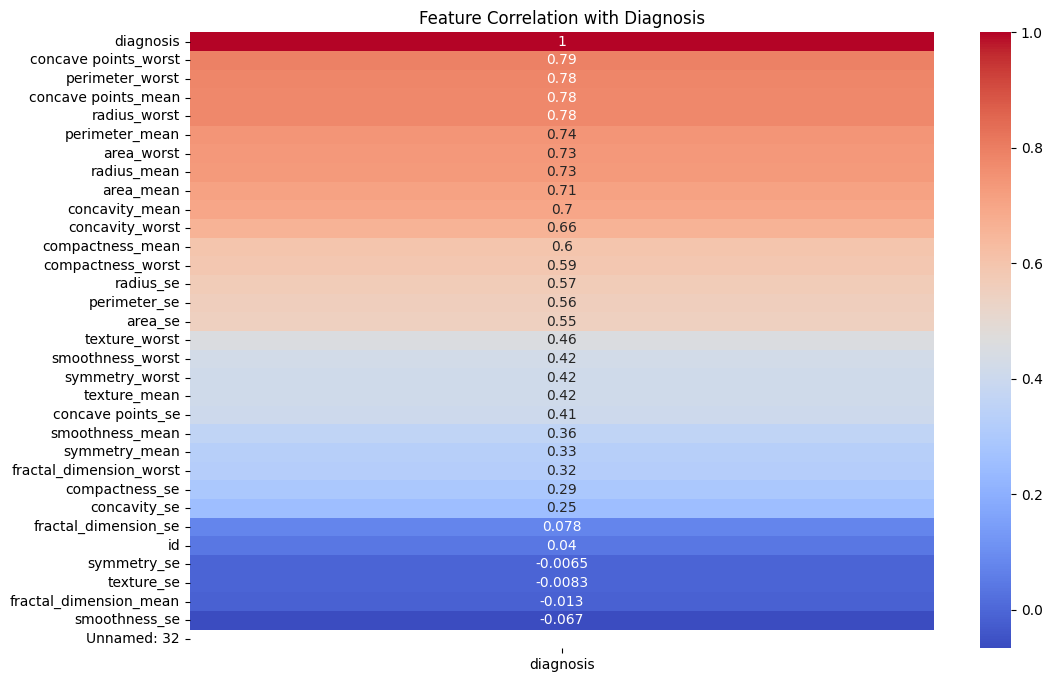

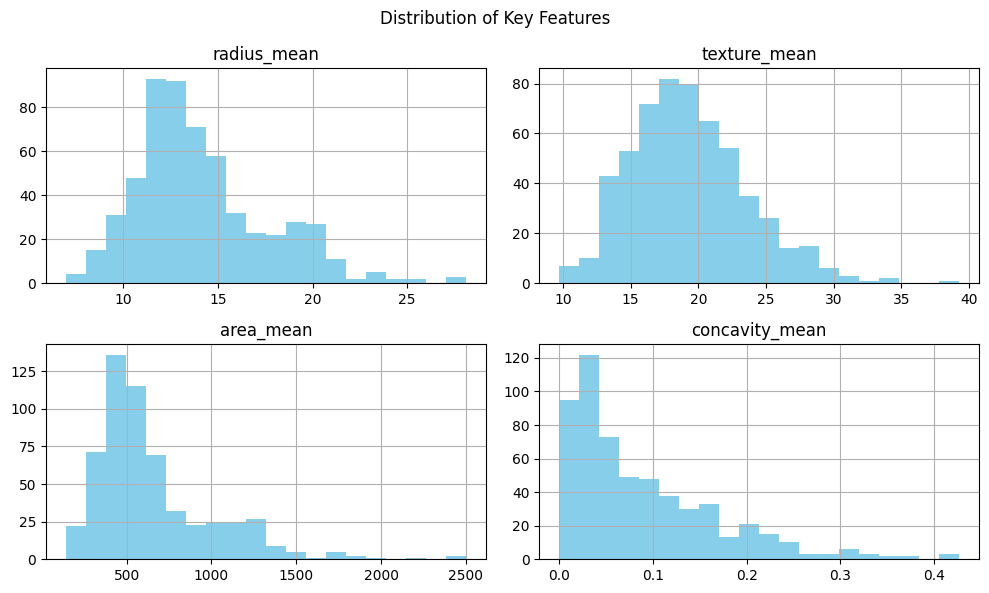

In [8]:
print("Diagnosis value counts:")
print(df['diagnosis'].value_counts())

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette='Set2', legend=False)
plt.title('Count of Benign vs Malignant Tumors')
plt.show()

print("\nStatistical summary:")
print(df.describe())

# 4. Check correlation with diagnosis
# First encode 'diagnosis': M=1, B=0 for correlation calculation
df_corr = df.copy()
df_corr['diagnosis'] = df_corr['diagnosis'].map({'M': 1, 'B': 0})

# Plot correlation heatmap with diagnosis
plt.figure(figsize=(12, 8))
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix[['diagnosis']].sort_values(by='diagnosis', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title('Feature Correlation with Diagnosis')
plt.show()

# 5. Distribution of a few key features
features_to_plot = ['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean']
df[features_to_plot].hist(bins=20, figsize=(10, 6), color='skyblue')
plt.suptitle('Distribution of Key Features')
plt.tight_layout()
plt.show()


## 🧹 Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

In [9]:
# Drop the 'Unnamed: 32' column and 'id'
# 1. Drop unnecessary columns
df.drop(['id'], axis=1, inplace=True)

# Some versions of the dataset have an 'Unnamed: 32' column with all NaNs — remove if it exists
if 'Unnamed: 32' in df.columns:
    df.drop(['Unnamed: 32'], axis=1, inplace=True)

# 2. Check missing values again after dropping
print("Missing values after cleanup:")
print(df.isnull().sum())

# 3. If any missing values remain, drop those rows (or impute if preferred)
df.dropna(inplace=True)

# 4. Confirm the shape after cleaning
print("\nDataset shape after cleaning:", df.shape)


Missing values after cleanup:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Dataset shape after cleaning: (569, 31)


## 📊 Step 4: Visualize the Data

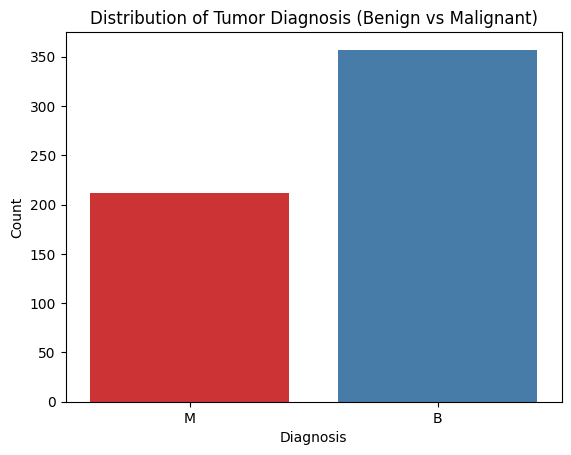

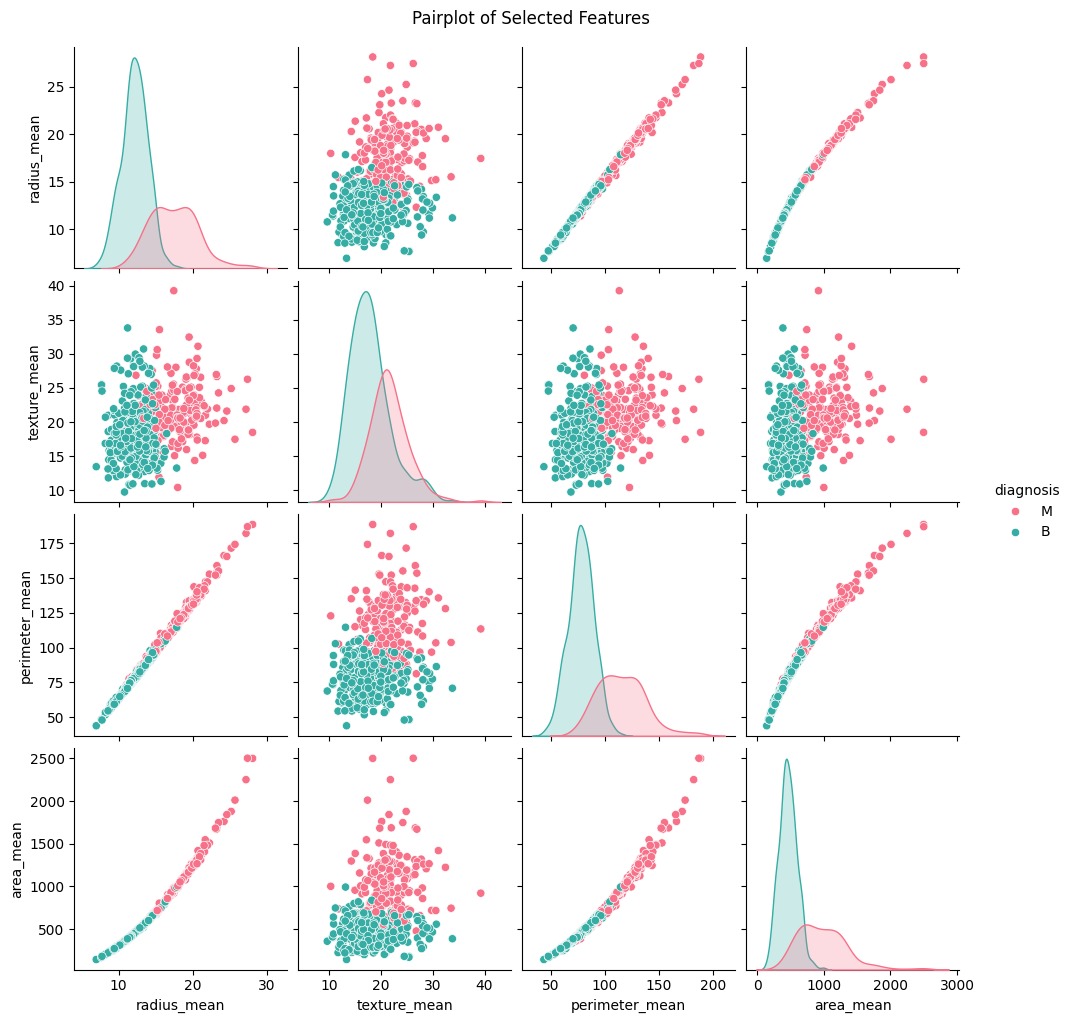

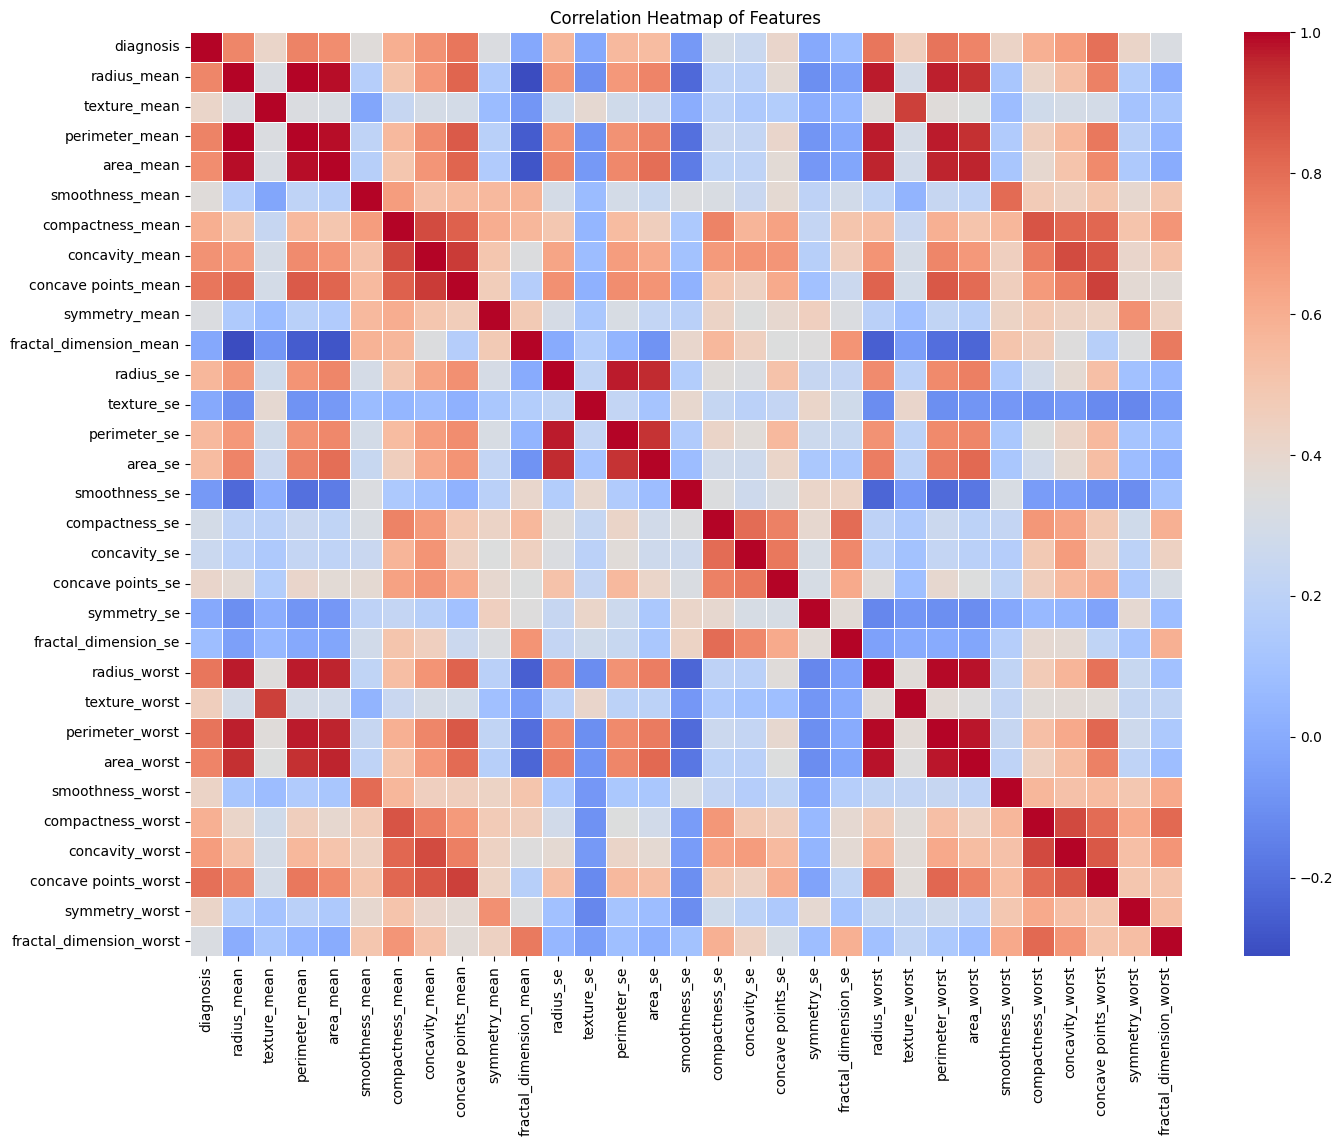

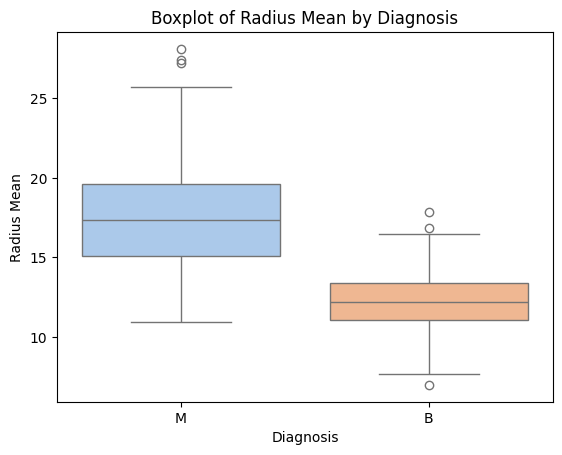

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Count Plot - Diagnosis distribution
sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette='Set1', legend=False)
plt.title('Distribution of Tumor Diagnosis (Benign vs Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

# 2. Pairplot - Select a few features to see their relationships
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis', palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# 3. Heatmap - Correlation between all features
df_corr = df.copy()
df_corr['diagnosis'] = df_corr['diagnosis'].map({'M': 1, 'B': 0})  # Convert to numeric for heatmap

plt.figure(figsize=(16, 12))
sns.heatmap(df_corr.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# 4. Boxplot - Example: radius_mean grouped by diagnosis
sns.boxplot(x='diagnosis', y='radius_mean', data=df, hue='diagnosis', palette='pastel', legend=False)
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()


## ⚙️ Step 5: Preprocess the Data

In [13]:
# Convert diagnosis column to 0 (benign) and 1 (malignant)

# Split features and labels

# Split into training and testing sets

# Scale the features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Convert 'diagnosis' to numeric: B = 0, M = 1
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

# 2. Split features and labels
X = df.drop('diagnosis', axis=1)  # Features
y = df['diagnosis']              # Labels

# 3. Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Confirm shapes
print("Training feature shape:", X_train.shape)
print("Testing feature shape:", X_test.shape)


Training feature shape: (455, 30)
Testing feature shape: (114, 30)


## 🤖 Step 6: Train a Machine Learning Model

In [14]:
# Use Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

# Confirm model has been trained
print("✅ Logistic Regression model trained successfully.")



✅ Logistic Regression model trained successfully.


## 🧪 Step 7: Evaluate the Model

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test data
y_pred = logreg_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("🔍 Accuracy of the model:", round(accuracy * 100, 2), "%")

# Confusion Matrix
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malignant"]))


🔍 Accuracy of the model: 96.49 %

📊 Confusion Matrix:
[[71  1]
 [ 3 39]]

📋 Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## ✅ Conclusion

Awesome work! 🎉

You've successfully built a breast cancer prediction model using Logistic Regression. You explored the data, cleaned it, visualized it, trained a model, and evaluated its performance.

### 🚀 Next Steps
- Try different models like RandomForest or SVM
- Perform feature selection
- Tune hyperparameters for better accuracy

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
rf_pred = rf_model.predict(X_test)

print("🌲 Random Forest Accuracy:", round(accuracy_score(y_test, rf_pred) * 100, 2), "%")
print("\n📋 Random Forest Classification Report:")
print(classification_report(y_test, rf_pred, target_names=["Benign", "Malignant"]))


🌲 Random Forest Accuracy: 97.37 %

📋 Random Forest Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      1.00      0.98        72
   Malignant       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [17]:
from sklearn.svm import SVC

# Create and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict and evaluate
svm_pred = svm_model.predict(X_test)

print("💠 SVM Accuracy:", round(accuracy_score(y_test, svm_pred) * 100, 2), "%")
print("\n📋 SVM Classification Report:")
print(classification_report(y_test, svm_pred, target_names=["Benign", "Malignant"]))


💠 SVM Accuracy: 96.49 %

📋 SVM Classification Report:
              precision    recall  f1-score   support

      Benign       0.95      1.00      0.97        72
   Malignant       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



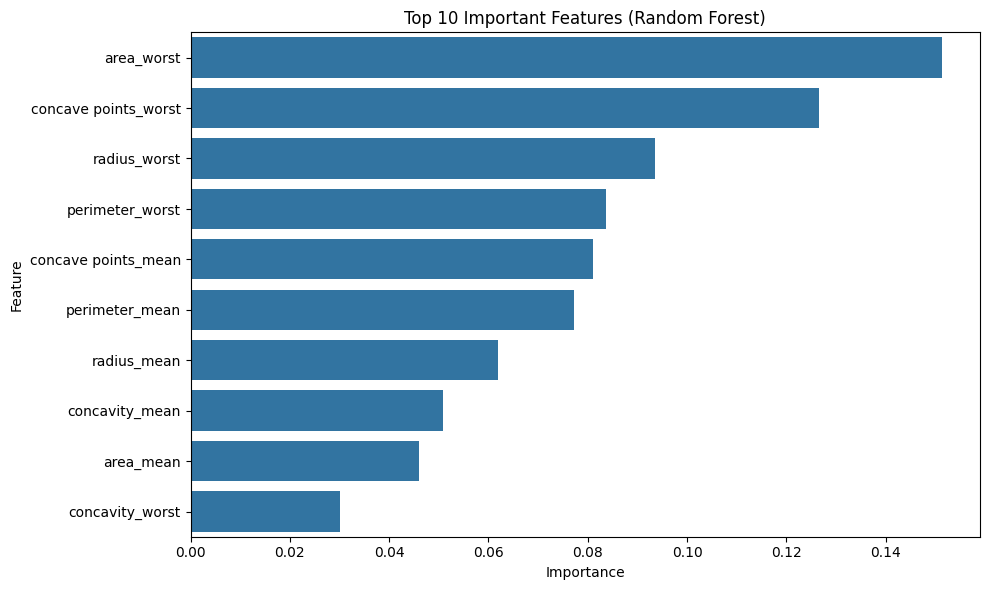

In [19]:
# Use trained Random Forest model from earlier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features (Random Forest)')
plt.tight_layout()
plt.show()

# Optionally: select top N features for a new dataset
top_features = feature_importance_df['Feature'].head(10).tolist()
X_top = df[top_features]


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Use GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid,
                               cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Fit on training data
rf_grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("🌲 Best Random Forest Params:", rf_grid_search.best_params_)
print("✅ Best RF CV Accuracy:", round(rf_grid_search.best_score_ * 100, 2), "%")


Fitting 5 folds for each of 72 candidates, totalling 360 fits
🌲 Best Random Forest Params: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
✅ Best RF CV Accuracy: 96.7 %
